In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install jupyterthemes

Defaulting to user installation because normal site-packages is not writeable


In [3]:
X = pd.read_csv("dataset/training_set_features.csv")
X.drop(columns="respondent_id", inplace=True)

y = pd.read_csv("dataset/training_set_labels.csv")
y_seasonal = y.seasonal_vaccine

y_xyz = y.xyz_vaccine

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

<Axes: >

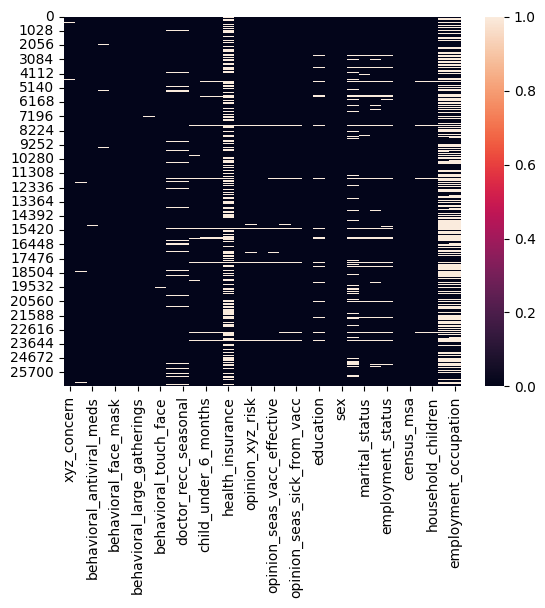

In [5]:
sns.heatmap(X.isnull())

In [6]:
numeric_cols = X.select_dtypes(include=["int", "float"]).columns
numeric_cols

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [7]:
# Handling missing values in numerical columns
def fill_with_mode(column):
    X[column] = X[column].fillna(X[column].mode()[0])

for col in numeric_cols:
    fill_with_mode(col)

<Axes: xlabel='age_group', ylabel='count'>

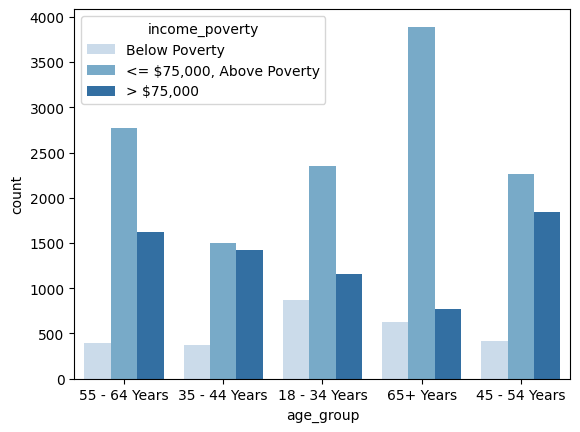

In [8]:
sns.countplot(hue="income_poverty", x="age_group", data=X, palette="Blues")

<Axes: xlabel='age_group', ylabel='count'>

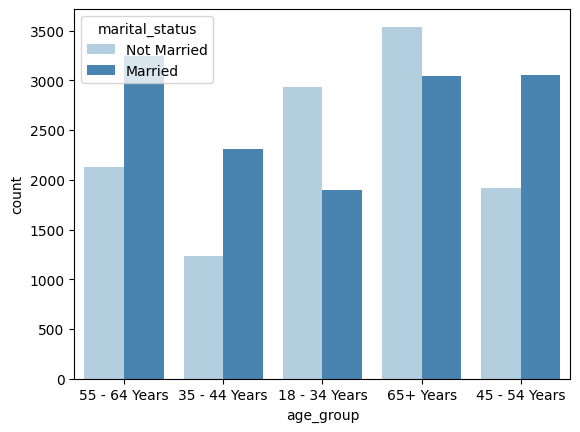

In [9]:
sns.countplot(x="age_group", hue="marital_status", data=X, palette="Blues")

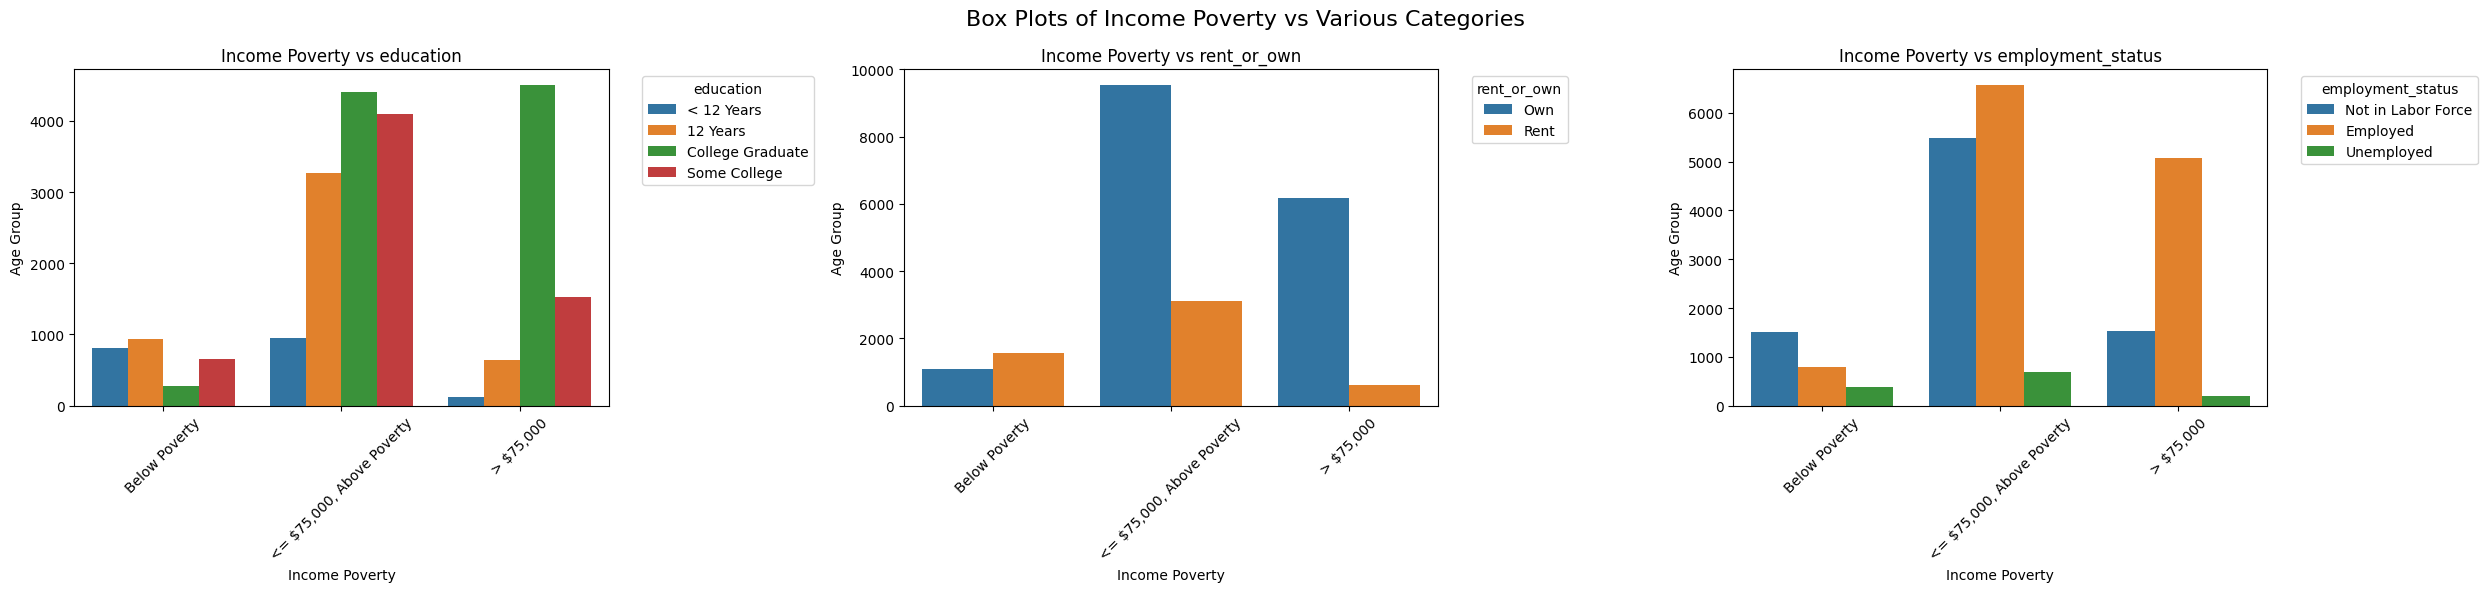

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to use for hue
hue_columns = ['education', 'rent_or_own', 'employment_status']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle('Box Plots of Income Poverty vs Various Categories', fontsize=16)

# Create box plots
for i, hue_col in enumerate(hue_columns):
    sns.countplot(x='income_poverty', hue=hue_col, data=X, ax=axes[i])
    axes[i].set_title(f'Income Poverty vs {hue_col}')
    axes[i].set_xlabel('Income Poverty')
    axes[i].set_ylabel('Age Group')
    
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [11]:
def fill_corr(df, target_cols, base_cols):
    """Fill missing values in target columns based on their correlation with base columns"""
    
    for target, base in zip(target_cols, base_cols):
        print(f"\nFilling {target} based on {base}")
        before = df[target].isnull().sum()
        
        df[target] = (df.groupby(base)[target]
                        .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
                        .fillna(df[target].mode().iloc[0]))
        
        after = df[target].isnull().sum()
        print(f"Missing values: {before} -> {after}")

target_cols = ['income_poverty', 'marital_status', 'education', 'rent_or_own', 'employment_status']
base_cols = ['age_group', 'age_group', 'income_poverty', 'income_poverty', 'income_poverty']

# Fill missing values
fill_corr(X, target_cols, base_cols)


Filling income_poverty based on age_group
Missing values: 4423 -> 0

Filling marital_status based on age_group
Missing values: 1408 -> 0

Filling education based on income_poverty
Missing values: 1407 -> 0

Filling rent_or_own based on income_poverty
Missing values: 2042 -> 0

Filling employment_status based on income_poverty
Missing values: 1463 -> 0


In [12]:
cols_to_drop = ['hhs_geo_region', 'employment_industry', 'employment_occupation']
X.drop(columns=cols_to_drop, axis = 1, inplace=True)
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [13]:
# Categorical Encoding
categorical_cols = X.select_dtypes(include="object").columns
print(categorical_cols)

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa'],
      dtype='object')


In [14]:
ordinal_cols = ['age_group', 'education', 'income_poverty']
nominal_cols = ['race', 'sex', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

In [15]:
from sklearn.preprocessing import OrdinalEncoder

nominal_encoded_df = pd.get_dummies(X[nominal_cols], drop_first=True)

ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(X[ordinal_cols])

# Converting to DataFrame
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_cols)

df_encoded = pd.concat([ordinal_encoded_df, nominal_encoded_df, X[numeric_cols]], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_seasonal, test_size = 0.33)
lr_seasonal = LogisticRegression()

lr_seasonal.fit(X_train, y_train)
lr_seasonal.score(X_train, y_train)

0.7752193595260717

In [17]:
lr_seasonal.score(X_test, y_test)

0.7743362831858407

In [18]:
from sklearn.svm import SVC

svm_seasonal = SVC(kernel="rbf")
svm_seasonal.fit(X_train, y_train)
svm_seasonal.score(X_train, y_train)

0.7914268149555692

In [19]:
svm_seasonal.score(X_test, y_test)

0.7795552530065805

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_xyz, test_size=0.33)

lr_xyz = LogisticRegression()
lr_xyz.fit(X_train, y_train)
lr_xyz.score(X_train, y_train)

/home/ash_9476/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8350192812831834

In [21]:
lr_xyz.score(X_test, y_test)

0.8377581120943953

In [22]:
svm_xyz = SVC(kernel="rbf")
svm_xyz.fit(X_train, y_train)
svm_xyz.score(X_train, y_train)

0.83658413904879

In [23]:
svm_xyz.score(X_test, y_test)

0.8319718629453142